# Water bodies and Green Spaces

### Reads and loads a GeoJSON file containing water data for Berlin into a GeoDataFrame, then prints the column names.

In [31]:
import geopandas as gpd

# Load the GeoJSON or shapefile into a GeoDataFrame
water_data = gpd.read_file("water berlin.geojson")
# Display the column names
print(water_data.head(50))

                  id               @id  CEMT       access  \
0    relation/411448   relation/411448  None         None   
1    relation/411462   relation/411462  None         None   
2    relation/411464   relation/411464  None         None   
3    relation/412110   relation/412110  None         None   
4    relation/412111   relation/412111  None         None   
5    relation/412112   relation/412112  None         None   
6    relation/412145   relation/412145  None         None   
7    relation/412147   relation/412147  None         None   
8    relation/412169   relation/412169  None         None   
9    relation/412170   relation/412170  None         None   
10   relation/412171   relation/412171  None         None   
11   relation/412199   relation/412199  None         None   
12   relation/412205   relation/412205  None         None   
13  relation/2145505  relation/2145505  None         None   
14  relation/2145628  relation/2145628  None         None   
15       way/4041237    

### Visualizing water bodies and parks in Berlin using GeoPandas and Folium.

In [1]:

!pip install geopandas
!pip install folium

import geopandas as gpd
import folium

# Load the GeoJSON or shapefile data

file_path1 = 'water berlin.geojson' 
gdf1 = gpd.read_file(file_path1)

file_path2 = 'park berlin.geojson' 
gdf2 = gpd.read_file(file_path2)

# Create a Folium map centered at the mean of all geometries
map_center = [gdf1.geometry.centroid.y.mean(), gdf1.geometry.centroid.x.mean()]
map_water_green = folium.Map(location=map_center, zoom_start=10)

# Plot the first GeoDataFrame
for _, feature in gdf1.iterrows():#This line is initiating a loop to iterate over the rows of the GeoDataFrame gdf1.
    lat, lon = feature.geometry.centroid.y, feature.geometry.centroid.x  #The iterrows() method is used to iterate over DataFrame rows as (index, Series) pairs.
    name = feature['name'] if 'name' in feature else 'Area'
    water_marker = folium.Marker(
        [lat, lon],
        popup=name,
        icon=folium.Icon(color='blue', icon='tint', prefix='fa')
    )
    water_marker.add_to(map_water_green)

# Plot the second GeoDataFrame
for _, feature in gdf2.iterrows():
    lat, lon = feature.geometry.centroid.y, feature.geometry.centroid.x
    name = feature['name'] if 'name' in feature else 'Area'
    green_marker = folium.Marker(
        [lat, lon],
        popup=name,
        icon=folium.Icon(color='lightgreen', icon='tree', prefix='fa')  # 'tree' is the green symbol
    )
    green_marker.add_to(map_water_green)

# Display the map in the Colab notebook
map_water_green



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\VIGNESH\AppData\Local\Temp\ipykernel_18924\266657780.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [gdf1.geometry.centroid.y.mean(), gdf1.geometry.centroid.x.mean()]


### Visualize distribution of water bodies and green spaces in Berlin using GeoDataFrames with subplots.

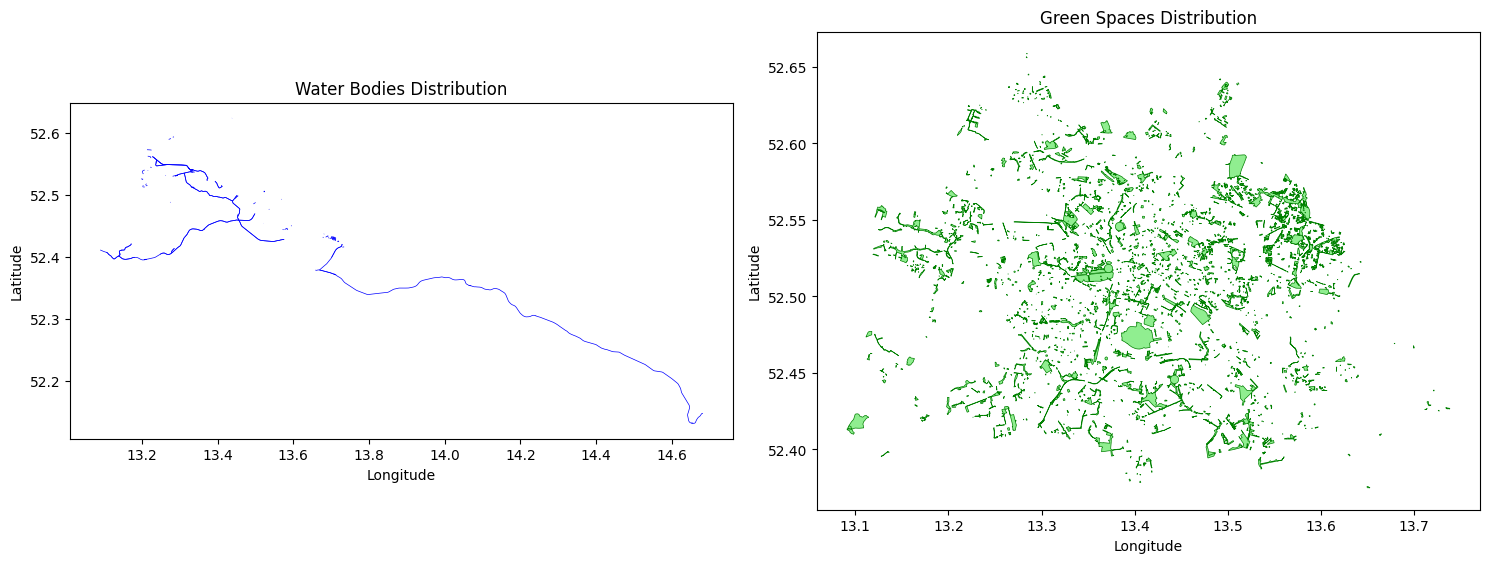

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON or shapefile data
file_path1 = 'water berlin.geojson' 
gdf1 = gpd.read_file(file_path1)

file_path2 = 'park berlin.geojson'  
gdf2 = gpd.read_file(file_path2)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot the first GeoDataFrame
gdf1.plot(ax=ax1, color='blue', edgecolor='black', linewidth=0.5)
ax1.set_title('Water Bodies Distribution')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Plot the second GeoDataFrame
gdf2.plot(ax=ax2, color='lightgreen', edgecolor='green', linewidth=0.5)

# Add labels and title for the second subplot
ax2.set_title('Green Spaces Distribution')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


### Visualizing water bodies and green spaces in Berlin.

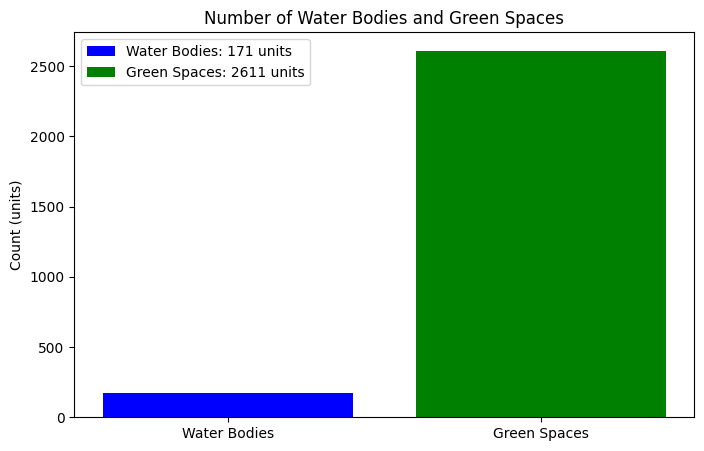

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON data for water bodies and green spaces
water_bodies_path = "water berlin.geojson"
green_spaces_path = "park berlin.geojson"

water_bodies_gdf = gpd.read_file(water_bodies_path)
green_spaces_gdf = gpd.read_file(green_spaces_path)

# Filter data based on the "waterway" column for water bodies
water_bodies_gdf = water_bodies_gdf[water_bodies_gdf["waterway"].notnull()]

# Bar chart for water bodies and green spaces on the same set of axes
fig, ax = plt.subplots(figsize=(8, 5))

# Bar chart for water bodies
water_bodies_count = len(water_bodies_gdf)
ax.bar(["Water Bodies"], [water_bodies_count], color='blue', label=f'Water Bodies: {water_bodies_count} units')

# Bar chart for green spaces
green_spaces_count = len(green_spaces_gdf)
ax.bar(["Green Spaces"], [green_spaces_count], color='green', label=f'Green Spaces: {green_spaces_count} units')

ax.set_title('Number of Water Bodies and Green Spaces')
ax.set_ylabel('Count (units)')
ax.legend()

plt.show()


### Visualize the distribution of water bodies and green spaces in Berlin through a pie chart.

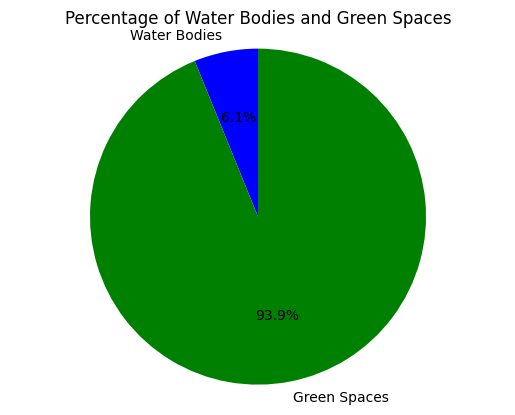

In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON data for water bodies and green spaces
water_bodies_path = "water berlin.geojson"
green_spaces_path = "park berlin.geojson"

water_bodies_gdf = gpd.read_file(water_bodies_path)
green_spaces_gdf = gpd.read_file(green_spaces_path)

# Combine counts for water bodies and green spaces
total_water_bodies = len(water_bodies_gdf)
total_green_spaces = len(green_spaces_gdf)

# Pie chart for combined water bodies and green spaces
labels = ['Water Bodies', 'Green Spaces']
sizes = [total_water_bodies, total_green_spaces]
colors = ['blue', 'green']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax.set_title('Percentage of Water Bodies and Green Spaces')

plt.show()


### The distribution of the top 10 water body areas in Berlin.

Column Names: Index(['id', '@id', 'CEMT', 'access', 'alt_name', 'boat', 'closed', 'depth',
       'description', 'destination', 'draft', 'fixme', 'have_riverbank',
       'historic', 'intermittent', 'layer', 'lock', 'lock_name', 'maxdraft',
       'maxlength', 'maxspeed', 'maxwidth', 'motorboat', 'name', 'name:hsb',
       'name:it', 'name:ja', 'name:pl', 'name:ru', 'name:sk', 'note',
       'obstacle', 'old_name', 'old_name:etymology:wikidata',
       'old_name:etymology:wikipedia', 'opening_hours', 'passage_time',
       'phone', 'ref', 'ref:fgkz', 'river:waterway_distance', 'sailboat',
       'seamark:name', 'seamark:type', 'self_service', 'ship', 'source',
       'tunnel', 'type', 'vhf', 'waterway', 'waterway:maxspeed', 'width',
       'wikidata', 'wikipedia', '@relations', 'geometry'],
      dtype='object')


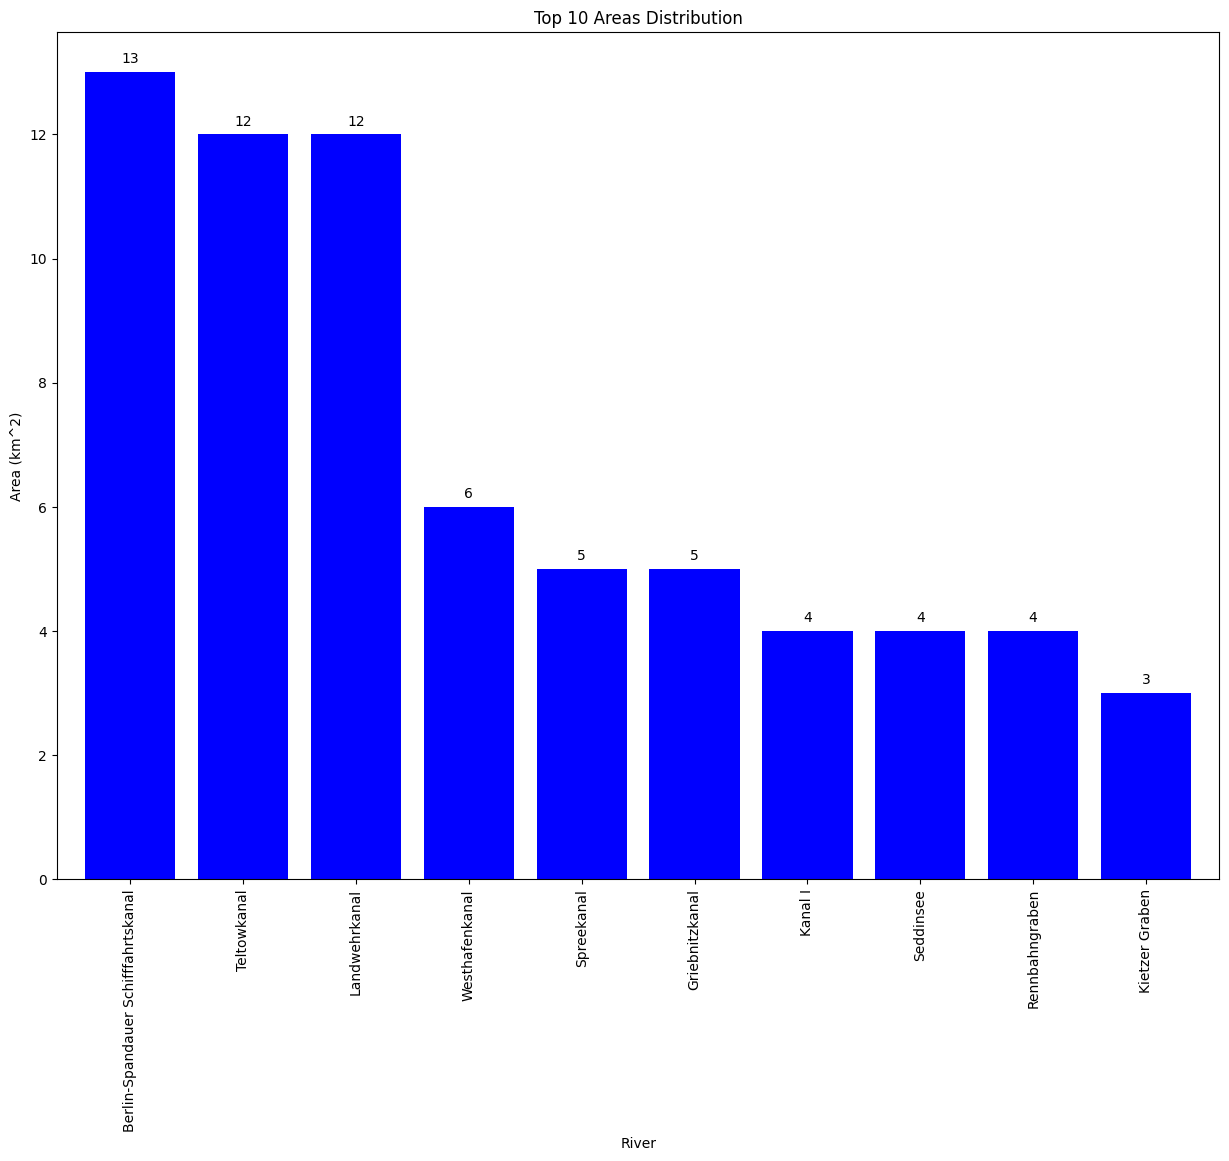

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON data
file_path = 'water berlin.geojson' 
gdf = gpd.read_file(file_path)

# Print column names to identify the correct column for areas
print("Column Names:", gdf.columns)

# Assuming your GeoDataFrame has a column indicating the different areas
# Replace 'name' with the correct column name if needed
area_column_name = 'name'

# Get counts for each area
area_counts = gdf[area_column_name].value_counts()

# Select only the top 10 values
top_10_areas = area_counts.head(10)

# Create a bar chart
fig, ax = plt.subplots(figsize=(15, 11))

# Add data labels to the top of each bar
for i, v in enumerate(top_10_areas):
    ax.text(i, v+0.1, str(v), ha='center', va='bottom')

top_10_areas.plot(kind='bar', color='blue', width=0.8, ax=ax)

ax.set_xlabel('River')
ax.set_ylabel('Area (km^2)')
ax.set_title('Top 10 Areas Distribution')

plt.show()


### The distribution of the top 10 park areas using a bar chart.

Column Names: Index(['id', '@id', 'abandoned:amenity', 'access', 'addr:city', 'addr:country',
       'addr:housenumber', 'addr:postcode', 'addr:street', 'addr:suburb',
       ...
       'whatsapp', 'whc:criteria', 'whc:inscription_date', 'wheelchair',
       'wheelchair:description', 'wikidata', 'wikimedia_commons', 'wikipedia',
       'year_of_construction', 'geometry'],
      dtype='object', length=128)


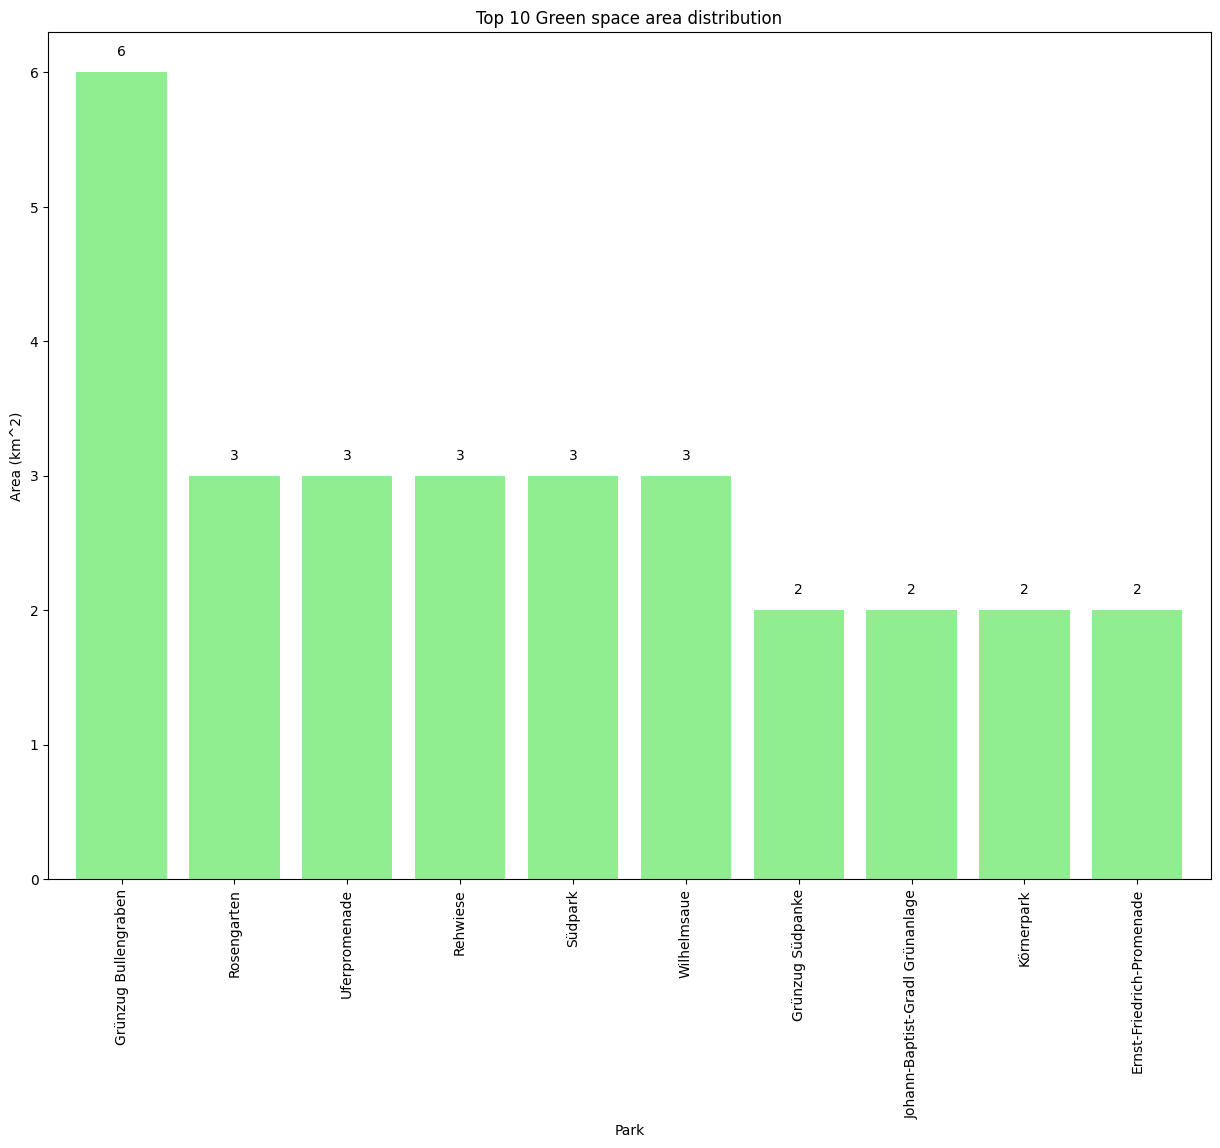

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON data
file_path = 'park berlin.geojson'  
gdf = gpd.read_file(file_path)

# Print column names to identify the correct column for areas
print("Column Names:", gdf.columns)

# Assuming your GeoDataFrame has a column indicating the different areas
# Replace 'name' with the correct column name if needed
area_column_name = 'name'

# Get counts for each area
area_counts = gdf[area_column_name].value_counts()

# Select only the top 10 values
top_10_areas = area_counts.head(10)

# Create a bar chart
fig, ax = plt.subplots(figsize=(15, 11))

# Add data labels to the top of each bar
for i, v in enumerate(top_10_areas):
    ax.text(i, v+0.1, str(v), ha='center', va='bottom', color='black')

top_10_areas.plot(kind='bar', color='lightgreen', width=0.8, ax=ax)

ax.set_xlabel('Park')
ax.set_ylabel('Area (km^2)')
ax.set_title('Top 10 Green space area distribution')
plt.show()


### The distribution of green spaces (in green) and water bodies (in blue) in Berlin.

C:\Users\VIGNESH\AppData\Local\Temp\ipykernel_5644\2530449895.py:21: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


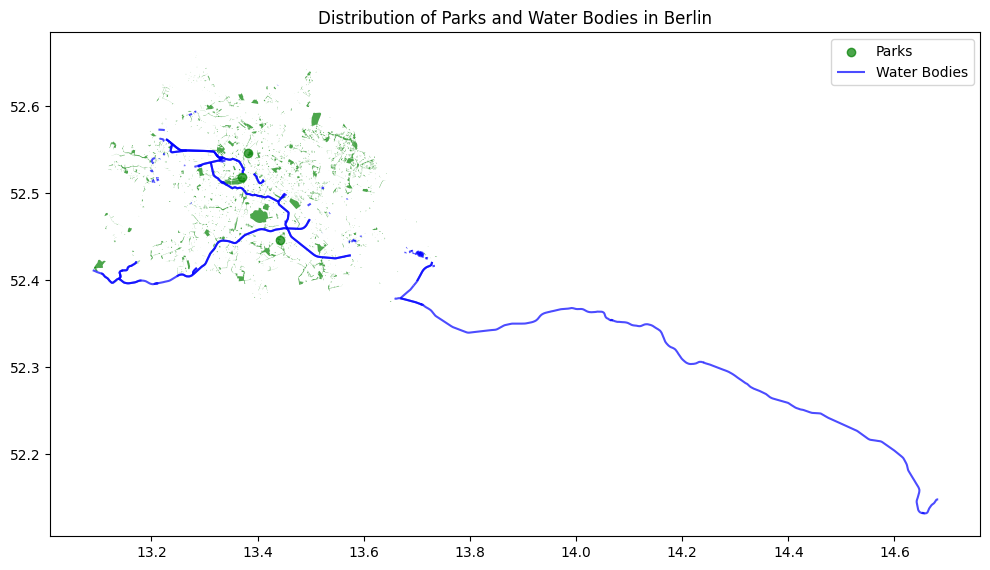

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON data for parks and water bodies
park_file_path = 'park berlin.geojson'
water_file_path = 'water berlin.geojson'

park_gdf = gpd.read_file(park_file_path)
water_gdf = gpd.read_file(water_file_path)

# Plot parks and water bodies on the same map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot parks in green
park_gdf.plot(ax=ax, color='green', alpha=0.7, label='Parks')

# Plot water bodies in blue
water_gdf.plot(ax=ax, color='blue', alpha=0.7, label='Water Bodies')

ax.set_title('Distribution of Parks and Water Bodies in Berlin')
ax.legend()

plt.show()
